# **Mall Customers Segmentation Project**

Customer Relationship Management (CRM) seeks to build relations with the most profitable clients by performing customer segmentation and designing appropriate marketing tools. This is particularly important within the competitive environment that combines sociodemographic characteristics of retail consumers and specialisation of sellers and buyers which forces companies to adopt a dynamic management of clients to achieve higher profits and to gain a higer share of the market than its competitors.



# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **2. Load Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [71]:
import io
df = pd.read_csv('Mall_Customers.csv')

In [72]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [73]:
df.shape

(200, 5)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [75]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **3. Exploratory Data Analysis**

Check the number of null values.

In [76]:
100*df.isnull().sum()/df.shape[0]

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

**Customer Gender Visualization**

Create a count plot of the gender distribution across the mall customer dataset.

Text(0.5, 1.0, 'Customer Distribution by Gender')

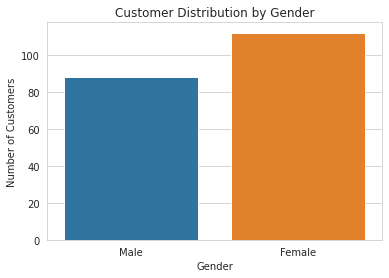

In [77]:
sns.countplot(df['Genre'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Gender')

**Customer Distribution by Age**

Create a distribution plot of the ages by frequencies

Text(0.5, 1.0, 'Customer Distribution by Age')

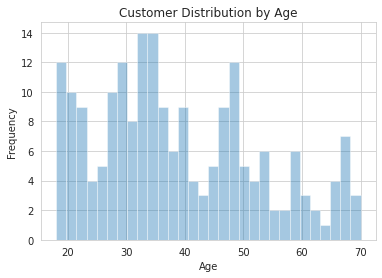

In [78]:
sns.distplot(df['Age'],kde=False,bins=30)
plt.ylabel('Frequency')
plt.title('Customer Distribution by Age')

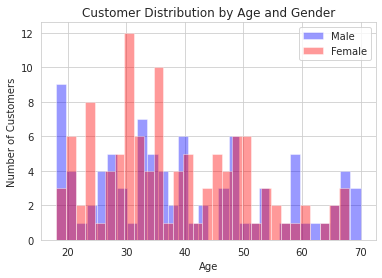

In [79]:
sns.distplot(df[df['Genre'] == 'Male']['Age'],kde=False,bins=30,color='blue',label='Male')
sns.distplot(df[df['Genre'] == 'Female']['Age'],kde=False,bins=30,color='red',label='Female')
plt.title('Customer Distribution by Age and Gender')
plt.ylabel('Number of Customers')
plt.legend()

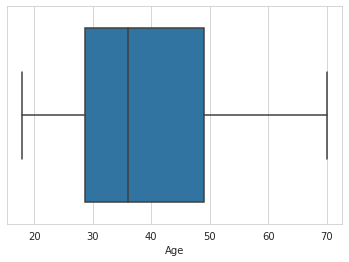

In [80]:
sns.boxplot(df['Age'])

**Annual Income Analysis**

Text(0, 0.5, 'Frequency')

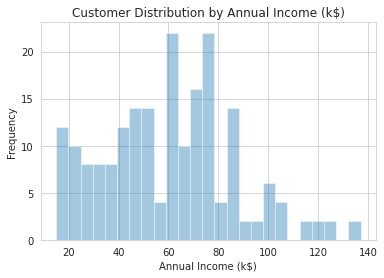

In [81]:
sns.distplot(df['Annual Income (k$)'],kde=False,bins=25)
plt.title('Customer Distribution by Annual Income (k$)')
plt.ylabel('Frequency')

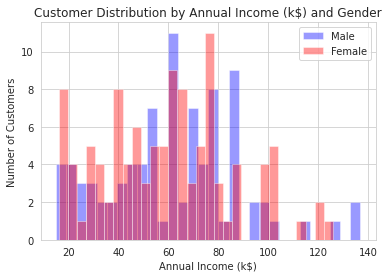

In [82]:
sns.distplot(df[df['Genre'] == 'Male']['Annual Income (k$)'],kde=False,bins=30,color='blue',label='Male')
sns.distplot(df[df['Genre'] == 'Female']['Annual Income (k$)'],kde=False,bins=30,color='red',label='Female')
plt.title('Customer Distribution by Annual Income (k$) and Gender')
plt.ylabel('Number of Customers')
plt.legend()

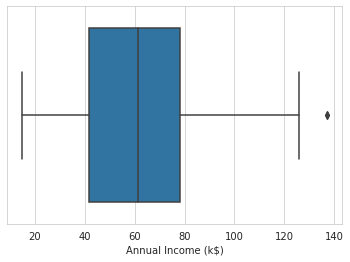

In [83]:
sns.boxplot(df['Annual Income (k$)'])

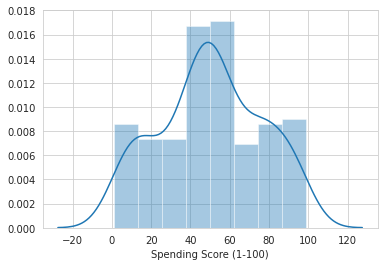

In [84]:
sns.distplot(df['Spending Score (1-100)'])

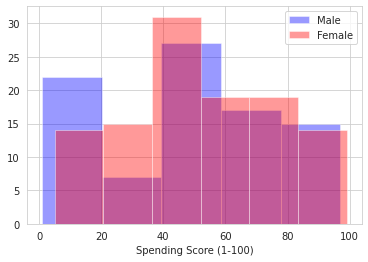

In [85]:
sns.distplot(df[df['Genre'] == 'Male']['Spending Score (1-100)'],color='blue',kde=False,label='Male')
sns.distplot(df[df['Genre'] == 'Female']['Spending Score (1-100)'],color='red',kde=False,label='Female')
plt.legend()

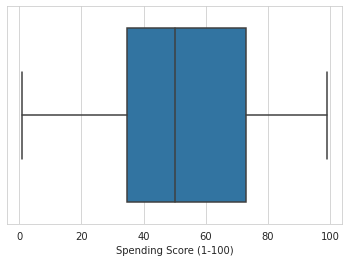

In [86]:
sns.boxplot(df['Spending Score (1-100)'])

**Create a pairplot of the Mall Customer Data.**

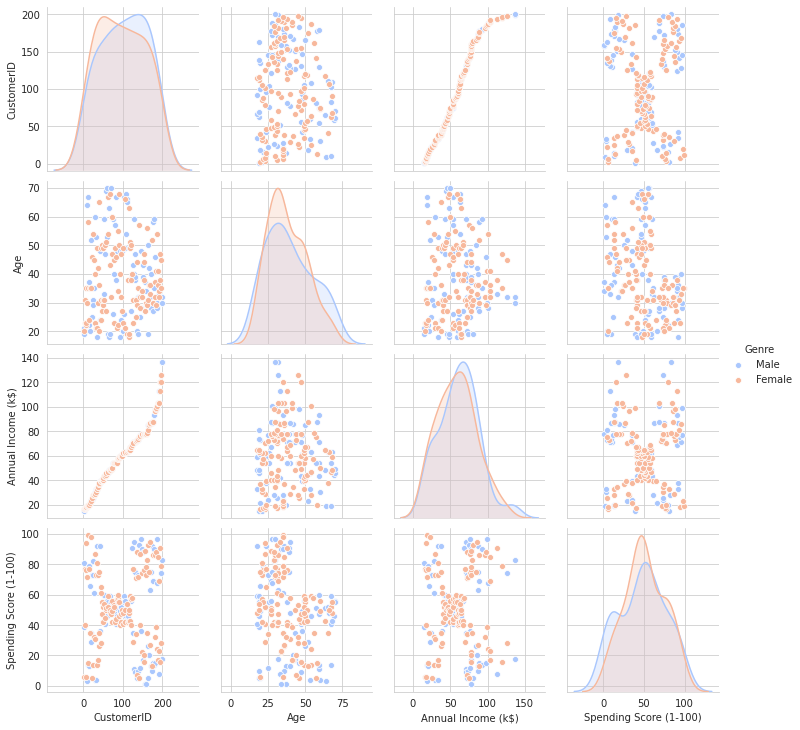

In [87]:
sns.pairplot(data=df,hue='Genre',palette='coolwarm')

**Create a heatmap of the Mall Customer Data.**

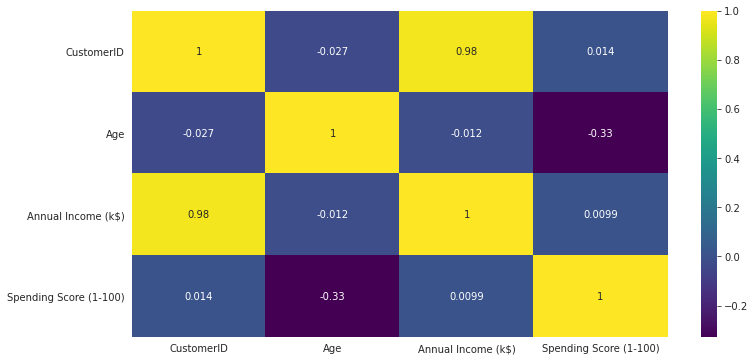

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

There seems to a strong positive correlation between CustomerID and Annual Income (k$). Let us investigate this further by plotting an lmplot.

Text(0.5, 1.0, 'CustomerID vs. Annual Income (k$)')

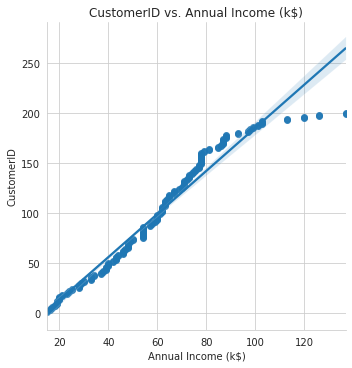

In [89]:
sns.lmplot(x='Annual Income (k$)',y='CustomerID',data=df)
plt.title('CustomerID vs. Annual Income (k$)')

# **4. Feature Engineering**

Check the data types of all the columns of the dataframe.

In [90]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [91]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [92]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [93]:
dmap = {'Male':1,'Female':0}
df['Genre'] = df['Genre'].map(dmap)

In [94]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# **5. Customer Segmentation via K-Means Clustering**

k-means clustering is a method of vector quantization, that aims to partition ***n*** observations into ***k*** cluster in which each observation belongs to the cluster  with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. The less the variation we have within clusters, the more homogenous (similar) the data points are within the same cluster.

The k-means algorithm can be summarised as follows:

1. Specify the number of clusters to be created.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
-Compute the sum of the squared distance between data points and all centroids.

-Assign each data point to the closest cluster (centroid).

-Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

**Determining Optimal Clusters**

Determining the optimal number of clusters in a data set is fundamental in partitioning into clusters, which requires the user to specify the number of clusters ***k*** to be generated.

The methods employed in determining the optimal number of cluster can be categorised into*** Direct Methods*** and ***Statistical Testing Methods***.

1. Direct Methods consist of optimising a criterion, that is, within cluster sum of squares. *Elbow* and *silhouette methods* are in this category.
2. Statistical Methods compare the evidence against the null hypothesis. *Gap statistic *is one of the examples.



* **Elbow method**

The well-known elbow method is to identify the number of clusters based on the assumption that the optimal number of clusters must produce small inertia, or total intra-cluster variation. As such, there will be a trade-off between the inertia and the number of clusters.

* **Silhouette method**

Silhouette score measures how well an observation is clustered and it estimates the average distance between clusters. It wants to find the optimal number of clusters that produce a subdivision of the dataset to dense blocks that are well separated from each other. 

The value will be between -1 and 1, whereas a value near 0 indicates overlapping clusters. Negative values generally indicate that an observation has been assigned to the wrong cluster.



* **Gap Statistic Method**

The gap statistic compares the total within intra-cluster variation for different values of k with their expected values under the null reference distribution of the data. Hence, the optimal choice of k is the value that maximizes the gap (meaning that the clustering structure is far away from a random uniform distribution of points).



.

**Normalizing the Data**


In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
data_scaled = scaler.fit_transform(df)

**Elbow Method**

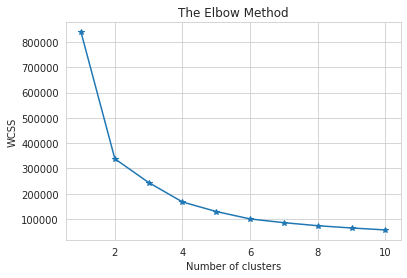

In [98]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot, we could conclude that the optimal number of cluster is 5 since it occurs at the bend in the elbow plot.

**Training the K-Means model on the dataset**

In [102]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,tol=0.0001).fit(data_scaled)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
kmeans.labels_

array([1, 1, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 1, 2, 1, 4, 2, 4, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 4, 2, 4, 1, 2, 2, 2, 2, 2, 2, 2, 1, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 4, 1, 2, 2, 4, 1,
       2, 2, 1, 2, 4, 2, 2, 2, 4, 1, 2, 1, 2, 2, 4, 1, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 1, 4, 2, 2, 1, 2, 0, 4, 1, 0, 0, 4, 1, 4, 0, 0, 4, 4, 4,
       4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 1, 4, 1, 3, 1,
       0, 0, 3, 0, 0, 1, 3, 0, 0, 1, 0, 0, 3, 1, 3, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 1, 3, 1, 0, 0,
       3, 3, 3, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       3, 3], dtype=int32)

In [104]:
kmeans.cluster_centers_

array([[ 7.47347850e-01, -2.77555756e-16,  3.63247863e-01,
         5.41287189e-01,  5.31557067e-01],
       [ 4.52680067e-01,  1.00000000e+00,  1.99252137e-01,
         3.31284153e-01,  7.14852608e-01],
       [ 2.41206030e-01, -3.33066907e-16,  4.08156499e-01,
         1.96438666e-01,  5.00703730e-01],
       [ 8.31448911e-01,  1.00000000e+00,  3.58974359e-01,
         6.18510929e-01,  2.56377551e-01],
       [ 3.35786073e-01,  1.00000000e+00,  7.54120879e-01,
         2.60538642e-01,  3.84839650e-01]])

In [110]:
clusters_data = pd.DataFrame(data_scaled,columns=['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'])
clusters_data['Cluster'] = kmeans.labels_
clusters_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,1.0,0.019231,0.000000,0.387755,1
1,0.005025,1.0,0.057692,0.000000,0.816327,1
2,0.010050,0.0,0.038462,0.008197,0.051020,2
3,0.015075,0.0,0.096154,0.008197,0.775510,2
4,0.020101,0.0,0.250000,0.016393,0.397959,2


In [111]:
clusters_data.groupby('Cluster').count()['Spending Score (1-100)']

Cluster
0    54
1    36
2    58
3    24
4    28
Name: Spending Score (1-100), dtype: int64

# **6. Evaluation**

In [112]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(clusters_data['Cluster'],kmeans.labels_))
print(classification_report(clusters_data['Cluster'],kmeans.labels_))

[[54  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 58  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        28

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

